<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 3</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Gabriel Carmona;201773509-0;nueva</h3>
    <h3 align="center">Jorge Ludueña;201773507-4;nueva</h3>
    <h3 align="center">Mayo 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día *cuando se baje el paro hay fecha*.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab3.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**

## Tips V.2

A la hora de trabajar con números o procesos aleatorios a veces es importante poder replicar lo que usted realiza (pensando en un trabajo que se mostrará a la comunidad científica), para esto se tiene que, para generar la misma secuencia de números aleatorios, se debe pasar una *semilla* al generador de éstos. 

**R**
```R
set.seed(numero)
```

**Python**
```python
numpy.random.seed(numero) #libreria numpy 
random.seed(numero) #libreria random
#O de otra libreria que pueda utilizar para generar números aleatorios
```

Si desea puede aplicar esto en su laboratorio para que se pueda reproducir exactamente lo mismo que usted obtuvo.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sns
import pandas as pd
import math
import random 

## 1. LDA (40p)

Es de mucho interés hoy en día el hecho de poder construir un clasificador que pueda inferir reglas a partir de los datos para poder predecir a futuro, en esta sección trabajará con una versión simplificada del dataset del titanic (data_titanic.csv), la que contiene 3 columnas:

* Age: la edad del pasajero
* Fare: el precio del boleto
* Survived: si sobrevivió a la tragedia o no

(Si, estamos en el ámbito multivariado ahora)

El clasificador, en breves palabras, intenta maximizar $P(Y=survived|X=age,fare)$ asumiendo que los datos ($X$) provienen de una distribución Gaussiana Multivariada. Se espera que usted sea capaz de obtener los máximos verosímiles de los parámetros de esta distribución para poder construir su clasificador **a mano**.

>a) Construya un clasificador LDA que permita distinguir si un pasajero sobrevive o no dado su edad y precio del ticket. *Recomendación: Puede separar una cantidad pequeña de datos para utilizarlos para probar su clasificador, es muy importante que si hace esto, estos datos no sean utilizados en la construcción del clasificador* 

Cualquier uso de las funciones provistas por los lenguajes que implementen LDA implica puntaje 0 en esta sección **sin excepción**.

Esta pregunta es un poco extensa por lo que se recomienda leer bien el material provisto (mas abajo) y los libros guías del curso. No es necesario que responda todo de una, puede ir por partes, es más, esto es recomendable porque así puede ir ganando puntaje y no jugarse todo en un "funciona/no funciona" recuerde explicar bien su razonamiento.

Si se complica mucho intente el caso univariado primero (fare vs survived ó age vs survived), si solamente presenta el univariado podrá optar a solamente 10 puntos del total (siempre y cuando esté bien).

Material que podría resultar útil:
* [Video](https://www.youtube.com/watch?v=azXCzI57Yfc)
* [Articulo LDA](https://towardsdatascience.com/classification-part-2-linear-discriminant-analysis-ea60c45b9ee5)
* [Explicacion matematica de sklearn](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)
* Libros Guía indicados en el Syllabus(verosimilitud)


## 2. Teorema de la Función Inversa (10p)

El teorema de la función inversa permite generar variables aleatorias continuas con una función de distribución $F(x)$ a partir de la inversa $F^{-1}(x)$. Donde los valores generados en la función inversa están regidos por una distribución uniforme $u \sim U(0,1)$. 

En esta sección se trabajará con la distribución Weibull, cuya función de densidad de probabilidad está dada por:

\begin{aligned}
Weibull(\alpha,\beta) = \frac{\alpha}{\beta^{\alpha}}x^{\alpha -1}\cdot exp \left( \frac{-x}{\beta}\right)^{\alpha}
\end{aligned}

Para trabajar el teorema de la función inversa siga los siguientes pasos:

1. Identificar la función que defina a la variable aleatoria.
2. De dicha función calcular la función de densidad acumulada. Explique en breves palabras como obtenerla y si es invertible o no (Lo de invertible hace referencia a esta función de densidad acumulada Weibull en particular y no olvide mencionar cual es la función de densidad acumulada Weibull).
3. De la función de densidad acumulada despejar la variable X. La distribución Weibull a trabajar tiene parámetros $\alpha = 10$ y $\beta = 3$
4. Generar 10000 valores que siguen la distribución $u \sim U(0,1)$ y utilícelos como argumento en la función inversa encontrada
5. Genere una distribución weibull de tamaño 10000 con los mismos $\alpha$ y $\beta$ que la trabajada. Y haga un gráfico de la densidad de dichos valores. 
6. Concluya respecto a lo que observa en ambas gráficas.

2)Integrando la ecuacion presentada, desde 0 a una variable, se obtiene las ecuacion de densidad acumulada la cual es:

\begin{aligned}
F(t;\alpha,\beta) = 1-exp \left( -\left( \frac{x}{\beta}\right)^{\alpha}\right)
\end{aligned}

La cual tiene inversa, para un dominion con los x >= 0 y un Recorrido entre 0 y 1 inclusivo. Dicha inversa equivale a:

\begin{aligned}
F^{-1}(x;\alpha,\beta) = -\beta \cdot \left( ln \left( 1-x \right) \right)^{\frac{1}{\alpha}}
\end{aligned}

Utilizando los valores a tabajar se obtiene:

\begin{aligned}
F^{-1}(x) = -3 \cdot \left( ln \left( 1-x \right) \right)^{\frac{1}{10}}
\end{aligned}

C:\Users\Jorge\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


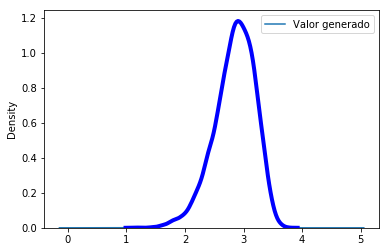

In [2]:
"""##
# Utilizando stats.uniform.rvs, se generan los valores que siguen la distribución uniforme.
# Se insertan los datos la funcion inve(x), la cual calcula la expresión antes presentada,
# con la cual se obtiene la distribución de Weibull
# Luego, con numpy.random.weibull, se genera directamente una distribución de weibull
# Por ultimo, utilizando pandas y seaborn, se grafican dichas distribuciones
"""

def inve(x):
    return (3*(math.log(1/(1-x)))**(0.1))

np.random.seed(2)
apa = stats.uniform.rvs(size=10000)
np.random.seed(10)
epe = np.random.weibull(a=10,size=10000)*3
l=[]
for i in apa:
    l.append(inve(i))

    
df= pd.DataFrame({'Valor generado':l})
ax= df.plot.kde()

sns.distplot(l, hist=False, kde=True, 
             bins=30, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

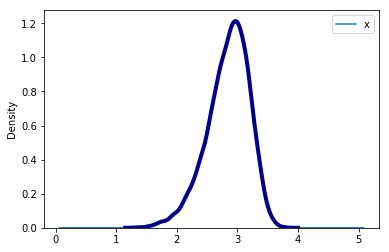

In [3]:
df= pd.DataFrame({'x':epe})
ax= df.plot.kde()

sns.distplot(epe, hist=False, kde=True, 
             bins=30, color = 'darkblue', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})

#sns.distplot(epe, hist=False, kde=True, 
#             bins=30, color = 'darkblue', 
#             hist_kws={'edgecolor':'red'},
#             kde_kws={'linewidth': 4})

Se puede observar que ambos gráficos de densidad poseen un gran parentesco, por lo cual podemos concluir que la función acumulada inversa de Weibull, con valores que siguen la distribución normal, efectivamente se genera una distribución de Weibull.

## 3. Teorema del Límite Central (30p)

El teorema del límite central es uno de los postulados más importantes de estadística. En esta sección se procederá a comprobarlo en su forma clásica. 

Sea $x_{1},x_{2},....,x_{n}$ una muestra aleatoria de tamaño $n$ IID extraidas de una distribución con valor esperado $\mu$ y varianza finita $\sigma^{2}$. Si calculamos la media muestral: 

$$ \bar{X}_{n} = \frac{\sum x_{i}}{n}$$

Y repetimos este proceso una gran cantidad de veces $(P)$ tendremos una distribución de las medias de las muestras (*Sample mean distribution*). El TLC establece que, si el número de repeticiones es lo suficientemente grande: 

$$ \bar{X} \sim N\left(\mu,\sqrt{\frac{\sigma^{2}}{n}}\right)$$ 

En esta sección se trabajará con la siguiente distribución y se demostrará lo que enuncia el TLC.

| Valor | Probabilidad |
|:-----:|:------------:|
|   1   |      0.1     |
|   2   |      0.2     |
|   5   |     0.05     |
|   6   |     0.05     |
|   7   |      0.2     |
|   9   |     0.10     |
|   10  |     0.05     |
|   11  |     0.2      |
|   12  |     0.05     |

>a) Determine el valor esperado y la varianza **TEÓRICOS**

El valor esperado de esta distribución corresponde a realizar el siguiente cálculo:

$E[X] = 1\cdot0.1+2\cdot0.2+5\cdot0.05+6\cdot0.05+7\cdot0.2+9\cdot0.1+10\cdot0.05+11\cdot0.2+12\cdot0.05$
    
Lo cual se obtiene que $E[X] = 6.65$.

In [4]:
print(1*0.1+2*0.2+5*0.05+6*0.05+7*0.2+9*0.1+10*0.05+11*0.2+12*0.05)

6.65


Lo cual se obtiene que $E[X] = 6.65$.

Ahora bien la varianza a determinar corresponderá a lo siguiente:

$V[X] = E[X^{2}] - E[X]^{2}$

Lo cual realizando los cálculo se obtiene que $V[X] = 14.03$

In [5]:
print(round(1*1*0.1+2*2*0.2+5*5*0.05+6*6*0.05+7*7*0.2+9*9*0.1+10*10*0.05+11*11*0.2+12*12*0.05-6.65*6.65,2))

14.03


>b) Con $P = 10,1000$ calcule la media de muestras de tamaño : $n \in[2,10,30,100,1000]$ compare los resultados obtenidos para los dos $P$ dados. Presente los datos en una tabla ordenada con columnas: $n,\;P=10,\;P=1000$ Comente, ¿qué parece influir mas, la cantidad de repeticiones, el tamaño de la muestra o ambas?

En la siguiente celda, se define una función la cual retorna los valores con las probabilidades correspondientes de la distribución dada en el enunciado.

In [6]:
def nani():
    x = random.random()
    if(0 <= x < 0.1):
        return 1
    elif(0.1 <= x < 0.3):
        return 2
    elif(0.3 <= x < 0.35):
        return 5
    elif(0.35 <= x < 0.4):
        return 6
    elif(0.4 <= x < 0.6):
        return 7
    elif(0.6 <= x < 0.7):
        return 9
    elif(0.7 <= x < 0.75):
        return 10
    elif(0.75 <= x < 0.95):
        return 11
    elif(0.95 <= x <= 1):
        return 12
    

En esta celda utilizando la seed número 2 y la función anterior, se realiza las muestras pedidas para la pregunta b, además de crear las listas con los valores utilizados en los gráficos de la pregunta c. Básicamente lo que hace es sumar y dividir por lo que se pide.

In [7]:
p_10 = []
p_1000 = []
p_1000_2 = []
p_1000_30 = []
p_1000_1000 = []
n = [2,10,30,100,1000]
random.seed(2)
for i in n:
    mega_prom = 0
    for j in range(10):
        suma = 0
        for k in range(i):
            suma += nani()
        mega_prom += suma/i
    mega_prom = mega_prom/10
    p_10.append(mega_prom)
    mega_prom = 0
    for j in range(1000):
        suma = 0
        for k in range(i):
            suma += nani()
        if(i == 2):
            p_1000_2.append(suma/i)
        elif(i == 30):
            p_1000_30.append(suma/i)
        elif(i == 1000):
            p_1000_1000.append(suma/i)
        mega_prom += suma/i
    mega_prom = mega_prom/1000
    p_1000.append(mega_prom)

In [8]:
dataFrameToShow = pd.DataFrame({"n": n, "P = 10": p_10, "P = 1000": p_1000})
dataFrameToShow.round(2)

,n,P = 10,P = 1000
0,2,7.45,6.70
1,10,7.24,6.60
2,30,7.01,6.64
3,100,6.76,6.66
4,1000,6.65,6.65


Observando la tabla obtenida, se puede visualizar que lo que influye más en la media obtenida es claramente el valor de P, ya que si este es muy grande en este caso 1000, se puede observar como los  valores de n dejan de influir o influyen muy poco en el valor de la media. 

De hecho si vemos el valor de la media utilizando el valor de p = 10, se puede observar como ahí si influye claramente n, ya que a medida que n sea más grande más cercano a la media teórica es el valor obtenido.

>c) Con lo obtenido en b) haga un histograma para las muestras de tamaño 2, 30 y 1000 de P = 1000. Comente lo que observa y concluya. ¿Se cumple lo que enuncia el teorema del límite central?

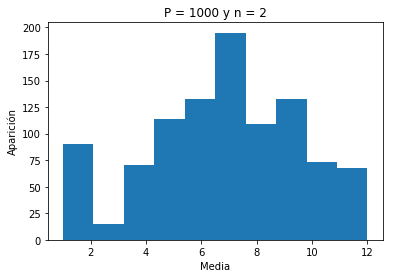

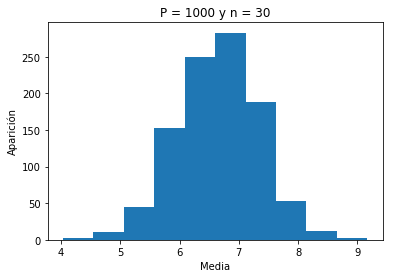

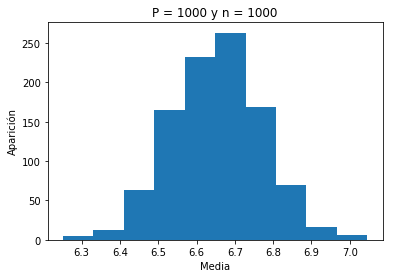

In [9]:
plt.xlabel('Media')
plt.ylabel('Aparición')
plt.title('P = 1000 y n = 2')
plt.hist(p_1000_2)
plt.show()
plt.xlabel('Media')
plt.ylabel('Aparición')
plt.title('P = 1000 y n = 30')
plt.hist(p_1000_30)
plt.show()
plt.xlabel('Media')
plt.ylabel('Aparición')
plt.title('P = 1000 y n = 1000')
plt.hist(p_1000_1000)
plt.show()

Se puede observar en los gráficos obtenidos que los 3 tienen la forma de ser una distribución normal, aunque si el valor de n es más pequeño más imperfecciones tendrá dentro de la gráfico, también se puede observar que los 3 gráficos tienen la media muy cercana o igual al valor esperado obtenido en la pregunta a, cumpliendo así por una parte el teorema del límite central. 

Luego también el teorema muestra que entre n sea más grande, la desviación estándar de la distribución normal será menor, y es efectivamente lo que se observa dentro de los gráficos, ya que se aprecia como para un n = 1000 la desviación estándar es muy menor a la desviación estándar observada en el gráfico de n = 2.

## 4. Ley de los Grande Números (20p)

En estadística, la ley de los grandes números engloba teoremas que describen el comportamiento del promedio de una distribución de variables aleatorias. La ley de los grandes números dice que, en pocas palabras, a medida que se aumenta el tamaño muestral el promedio de la distribución de variables aleatorias converge al promedio de la población completa.

Un estudio realizado en el casino de la universidad MSU, indica que el tiempo de espera en la cola del casino para obtener su almuerzo puede modelarse como una distribución Exponencial con parámetro: $\lambda = 0.1$

>a) **Utilizando las funciones provistas por los lenguajes** calcule la probabilida **teórica** de que un alumno espere menos de 10 minutos, exactamente 20 minutos y más de 50 minutos.

In [10]:
"""
# Utilizando stats.expon.cdf se calcula la probabilidad acumulada
"""

print("La probabilidad de que espere menos de 10 minutos es de: "+ str(stats.expon.cdf(10,scale= 1/0.1)))
print()
print("La probabilidad de que espere exactamente 20 segundos, es 0, debido a que la distribucion exponenencial es continua")
print()
print("La probabilidad de que espere mas de 50 minutos es de : "+str(1-stats.expon.cdf(50,scale= 1/0.1)))

La probabilidad de que espere menos de 10 minutos es de: 0.6321205588285577

La probabilidad de que espere exactamente 20 segundos, es 0, debido a que la distribucion exponenencial es continua

La probabilidad de que espere mas de 50 minutos es de : 0.006737946999085476


>b) Ahora genere 3 muestras de dicha distribución exponencial, con tamaños n = 5, 100, 300, 10000. Para cada una de estas muestras determine las mismas probabilidades calculadas en a) de manera empírica, comente sus resultados.

In [11]:
"""
# Utilizando stats.expon.rvs se generan varias distribuciones de distinto tamaño.
# Luego se filtran los valores, segun si cumplen o no una de las 3 posibilidades.
"""

def empir(n):
    
    random.seed(500)
    n1 = stats.expon.rvs(scale=1/0.1, size=n)

    l1 = []
    l2 = []
    l3 = []


    for i in n1:
        if i < 10:
            l1.append(i)
        elif i == 20:
            l2.append(i)
        elif i > 50:
            l3.append(i)

    prob1 = len(l1)/len(n1) 
    prob2 = len(l2)/len(n1)
    prob3 = len(l3)/len(n1)
    
    a = [prob1,prob2,prob3]
    return (a,n1)

d = {}

probs= ["Probabilidad de x > 10","Probabilidad de x = 20","Probabilidad de x < 20"]

for j in list(range(3)):
    q,n = empir(5)
    d[(j+1,5)] = n
    e,n = empir(100)
    d[(j+1,100)] = n
    w,n = empir(300)
    d[(j+1,300)] = n
    r,n = empir(10000)
    d[(j+1,10000)] = n
    print("Muestra "+ str(j+1)+":")
    print()
    
    print("Tamaño 5")
    de=0
    for i in q:
        print(probs[de]+": "+str(i))
        de+=1
    print()
    
    de=0
    print("Tamaño 100")
    for i in e:
        print(probs[de]+": "+str(i))
        de+=1
    print()

    de=0
    print("Tamaño 300")
    for i in w:
        print(probs[de]+": "+str(i))
        de+=1
    print()

    de=0
    print("Tamaño 10000")
    for i in r:
        print(probs[de]+": "+str(i))
        de+=1
    print()


Muestra 1:

Tamaño 5
Probabilidad de x > 10: 0.8
Probabilidad de x = 20: 0.0
Probabilidad de x < 20: 0.0

Tamaño 100
Probabilidad de x > 10: 0.61
Probabilidad de x = 20: 0.0
Probabilidad de x < 20: 0.0

Tamaño 300
Probabilidad de x > 10: 0.6666666666666666
Probabilidad de x = 20: 0.0
Probabilidad de x < 20: 0.0033333333333333335

Tamaño 10000
Probabilidad de x > 10: 0.6295
Probabilidad de x = 20: 0.0
Probabilidad de x < 20: 0.006

Muestra 2:

Tamaño 5
Probabilidad de x > 10: 0.4
Probabilidad de x = 20: 0.0
Probabilidad de x < 20: 0.0

Tamaño 100
Probabilidad de x > 10: 0.63
Probabilidad de x = 20: 0.0
Probabilidad de x < 20: 0.0

Tamaño 300
Probabilidad de x > 10: 0.64
Probabilidad de x = 20: 0.0
Probabilidad de x < 20: 0.016666666666666666

Tamaño 10000
Probabilidad de x > 10: 0.6343
Probabilidad de x = 20: 0.0
Probabilidad de x < 20: 0.0079

Muestra 3:

Tamaño 5
Probabilidad de x > 10: 0.8
Probabilidad de x = 20: 0.0
Probabilidad de x < 20: 0.0

Tamaño 100
Probabilidad de x > 10: 0.7

Se puede observar que a medida que aumenta la cantidad de datos, aumenta la precisión, acercándose más al valor teórico además se aprecia que efectivamente la probabilidad de que se obtenga exactamente 20 es muy cercana a 0 (por no decir 0).

>c) ¿Cuál debería ser la media **teórica** de todas estas distribuciones? ¿Y cuál es la empírica? ¿Si difieren o son iguales a qué se debe esto?

In [12]:
print("Media teórica: "+ str(stats.expon.mean(scale = 1/0.1)))

print()
print

print("Media empírica de la primera muestra y n = 5: " + str(sum(d[(1,5)])/len(d[(1,5)])))
print("Media empírica de la primera muestra y de n = 100: " + str(sum(d[(1,100)])/len(d[(1,100)])))
print("Media empírica de la primera muestra y de n = 300: " + str(sum(d[(1,300)])/len(d[(1,300)])))
print("Media empírica de la primera muestra y de n = 10000: " + str(sum(d[(1,10000)])/len(d[(1,10000)])))

print()
print()

print("Media empírica de la segunda muestra y n = 5: " + str(sum(d[(2,5)])/len(d[(2,5)])))
print("Media empírica de la segunda muestra y de n = 100: " + str(sum(d[(2,100)])/len(d[(2,100)])))
print("Media empírica de la segunda muestra y de n = 300: " + str(sum(d[(2,300)])/len(d[(2,300)])))
print("Media empírica de la segunda muestra y de n = 10000: " + str(sum(d[(2,10000)])/len(d[(2,10000)])))

print()
print()

print("Media empírica de la tercera muestra y n = 5: " + str(sum(d[(3,5)])/len(d[(3,5)])))
print("Media empírica de la tercera muestra y de n = 100: " + str(sum(d[(3,100)])/len(d[(3,100)])))
print("Media empírica de la tercera muestra y de n = 300: " + str(sum(d[(3,300)])/len(d[(3,300)])))
print("Media empírica de la tercera muestra y de n = 10000: " + str(sum(d[(3,10000)])/len(d[(3,10000)])))

Media teórica: 10.0

Media empírica de la primera muestra y n = 5: 9.31142613454868
Media empírica de la primera muestra y de n = 100: 10.282641830176269
Media empírica de la primera muestra y de n = 300: 9.300500400039276
Media empírica de la primera muestra y de n = 10000: 10.032904944602528


Media empírica de la segunda muestra y n = 5: 13.962675750402942
Media empírica de la segunda muestra y de n = 100: 9.446417083682963
Media empírica de la segunda muestra y de n = 300: 10.07381811032628
Media empírica de la segunda muestra y de n = 10000: 10.073135970031366


Media empírica de la tercera muestra y n = 5: 11.195050664660675
Media empírica de la tercera muestra y de n = 100: 8.055162608036705
Media empírica de la tercera muestra y de n = 300: 9.626341714816114
Media empírica de la tercera muestra y de n = 10000: 10.156084491393688


Los valores no son exactamente el  valor teórico, sin embargo, mientras más datos se tienen, más cerca se encuentra el valor empírico del teórico (en la mayoría de los casos). Esto sucede debido a que los datos son al azar computacional, por lo cual existe la probabilidad de que no sigan exactamente la distribución exponencial. Otro factor es que como lo dice la ley de los grandes números, se podrían tener aún más datos, para mejorar la precisión. 

>d) Genere **un** gráfico de 4 boxplot (1 de cada distribución) y compárelos. Comente lo que observa y concluya respecto a la ley de los grandes números.

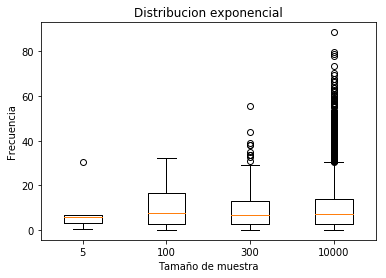

In [13]:
"""
# Utilizando matplotlib.pyplot.boxplot, se generan y muestran los boxplot de la primera
# muestra generada.
"""
fig1, ax1 = plt.subplots()
ax1.set_title('Distribucion exponencial')

ax1.boxplot([d[(1,5)],d[(1,100)],d[(1,300)],d[(1,10000)]],labels=["5","100","300","10000"])
ax1.set_xlabel("Tamaño de muestra")
ax1.set_ylabel("Frecuencia")
plt.show()





Se puede observar de los boxplots, que a mayor muestra, mayor será la certidumbre de los datos, a tal punto que si se tienen demasiados datos (cercano a infinito) no es necesario saber los valores teórico, esto debido a que mientras mayor sea la muestra mas representativa será de la población.

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el día *anunciado post_paro*
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.3
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)


## Meme 

Si se dividen el trabajo del lab, que no quede así:

<img src="img/trabajo.png">

